# Imports basic libraries and Datasets

In [36]:
import pandas as pd
import numpy as np

#the files are kept in the same folder as notebook
category_df = pd.read_csv('category.csv')
features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('TRAINFINAL.csv')
test_df = pd.read_csv('TESTFINAL.csv')


# Basic Dataset Exploration

In [2]:
category_df.head()

,Category,category type,No. of products
0,1,A,151
1,2,A,202
2,3,B,37
3,4,A,206
4,5,B,35


In [4]:
features_df.head()
#from above two tables using Category as common ID we can join the feature 
#dataframe with category dataframe

,Category,Date,delivery charge,Promtion1,Promtion2,Promtion3,Ad spend,App time,IsHoliday
0,1,05/02/10,2.572,NaN,NaN,NaN,211.096358,0.123365408,False
1,1,12/02/10,2.548,NaN,NaN,NaN,211.242170,0.123365408,True
2,1,19/02/10,2.514,NaN,NaN,NaN,211.289143,0.123365408,False
3,1,26/02/10,2.561,NaN,NaN,NaN,211.319643,0.123365408,False
4,1,05/03/10,2.625,NaN,NaN,NaN,211.350143,0.123365408,False


In [5]:
category_features =  pd.merge(category_df,features_df,on='Category')

In [8]:
len(features_df),len(category_df),len(category_features)

(5460, 30, 5460)

In [9]:
#checking for null values in the category_features dataframe
category_features.isnull().sum()
#almost 50-60% values in promotions are NaN 
#Promotion types has NAN values - which are considered as discounts 
#assuming that here discounts given are zero filling these values with zero


Category              0
category type         0
No. of products       0
Date                  0
delivery charge       0
Promtion1          2762
Promtion2          3340
Promtion3          2927
Ad spend            390
App time             13
IsHoliday             0
dtype: int64

In [10]:
category_features.Promtion1.fillna(0,inplace=True)
category_features.Promtion2.fillna(0,inplace=True)
category_features.Promtion3.fillna(0,inplace=True)

In [19]:
"""Ad spend is NaN in 390 places. Corresponding to each Ad spend value 
App time is either unknown value or NAN
considering that these values are indexes and very small in number compared to dataset we can fill these with mean 
indexes in corresponding columns"""
category_features[category_features['Ad spend'].isnull()].head()


,Category,category type,No. of products,Date,delivery charge,Promtion1,Promtion2,Promtion3,Ad spend,App time,IsHoliday
169,1,A,151,03/05/13,3.386,2298.63,2.00,129.90,NaN,#VALUE!,False
170,1,A,151,10/05/13,3.392,4624.61,83.88,42.38,NaN,#VALUE!,False
171,1,A,151,17/05/13,3.454,16170.50,92.00,8.32,NaN,#VALUE!,False
172,1,A,151,24/05/13,3.494,7959.89,178.00,1621.47,NaN,#VALUE!,False
173,1,A,151,31/05/13,3.466,2369.77,142.45,475.35,NaN,#VALUE!,False


In [21]:
category_features['Ad spend'].fillna(category_features['Ad spend'].mean(),inplace=True)

In [22]:
category_features.loc[category_features['App time']=='#VALUE!','App time']=np.NaN

In [25]:
#because of the presence of string value the data type converted to Object
category_features['App time'].dtype


dtype('O')

In [27]:
#converting the datatype to float
category_features['App time'] = category_features['App time'].astype(float)

In [29]:
#filled this index with mean as well
category_features['App time'].fillna(category_features['App time'].mean(),inplace=True)

In [31]:
category_features.isnull().sum()
#No Null values in the category feature data_frame

Category           0
category type      0
No. of products    0
Date               0
delivery charge    0
Promtion1          0
Promtion2          0
Promtion3          0
Ad spend           0
App time           0
IsHoliday          0
dtype: int64

In [44]:
train_df.sort_values(['category','sub category'],inplace=True)
#weekly GMV is given for category and sub category with IsHoliday label
#category spelling starts with small c so renaming the column
train_df.rename(columns={'category':'Category'},inplace=True)

In [45]:
test_df.head()

,Category,sub category,Date,IsHoliday
0,22,98,06/01/12,False
1,12,52,23/07/10,False
2,1,54,18/05/12,False
3,29,33,04/05/12,False
4,13,33,11/05/12,False


In [46]:
train_df.head()

,Category,sub category,Date,GMV,IsHoliday
831,1,1,05/02/10,24924.50,False
2174,1,1,12/02/10,46039.49,True
5138,1,1,19/02/10,41595.55,False
7239,1,1,26/02/10,19403.54,False
8716,1,1,05/03/10,21827.90,False


In [48]:
#for the prediction process train and test dataset both should go under same transformations so I will first perform 
#the feature engineering in the train which will be done similarly is test dataset as well

In [54]:
#Combining datasets train with category features and test with category features as well

In [119]:
#included IsHoliday in join just to not have two IsHoliday variable
train_combined  = pd.merge(train_df,category_features,on=['Category','Date','IsHoliday'])

In [120]:
#similarly do transformation of test data set
test_combined = pd.merge(test_df,category_features,on =['Category','Date','IsHoliday'])

In [121]:
train_combined.head()

,Category,sub category,Date,GMV,IsHoliday,category type,No. of products,delivery charge,Promtion1,Promtion2,Promtion3,Ad spend,App time
0,1,1,05/02/10,24924.50,False,A,151,2.572,0.0,0.0,0.0,211.096358,0.123365
1,1,2,05/02/10,50605.27,False,A,151,2.572,0.0,0.0,0.0,211.096358,0.123365
2,1,3,05/02/10,13740.12,False,A,151,2.572,0.0,0.0,0.0,211.096358,0.123365
3,1,4,05/02/10,39954.04,False,A,151,2.572,0.0,0.0,0.0,211.096358,0.123365
4,1,5,05/02/10,32229.38,False,A,151,2.572,0.0,0.0,0.0,211.096358,0.123365


In [122]:
#Date can be split into Month of the year and year so that we can analyse any 
#seasonality present in the dataset for GMV
def return_month(df):
    day,month,year = df['Date'].split('/')
    return month
def return_year(df):
    day,month,year = df['Date'].split('/')
    return year

In [123]:
train_combined['Month'] = train_combined.apply(return_month,axis=1)
train_combined['Year'] = train_combined.apply(return_year,axis=1)

In [124]:
test_combined['Month'] = test_combined.apply(return_month,axis=1)
test_combined['Year'] = test_combined.apply(return_year,axis=1)

# relations between dependent and independent variables for inference and feature selection

In [125]:
#library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
train_combined.groupby('IsHoliday')['GMV'].describe()
# GMV is higher whereever there is Holiday weak
# There are some negative GMV values which has to investigated as well

,count,mean,std,min,25%,50%,75%,max
IsHoliday,,,,,,,,
False,245157.0,17050.360427,23624.170695,-4988.94,2637.000,8338.050,21528.700,406988.63
True,18548.0,18447.850171,28787.334190,-798.00,2659.925,8802.805,23026.615,693099.36


In [127]:
len(train_combined[train_combined.GMV < 0])*1.0/len(train_combined)
#.2% of the value have negative gmv

0.0027644527028308145

In [128]:
#Removing these values from training set
train_combined = train_combined[train_combined.GMV>=0]

In [129]:
train_combined.groupby('IsHoliday')['GMV'].describe()

,count,mean,std,min,25%,50%,75%,max
IsHoliday,,,,,,,,
False,244488.0,17097.230735,23639.445406,0.0,2670.7050,8380.29,21581.9625,406988.63
True,18488.0,18507.999898,28814.607589,0.0,2693.9225,8869.05,23092.1850,693099.36


In [112]:
#Converting categorical variables into Labels as otherwise these can be considered as continous variables////


In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
train_combined.columns

Index([u'Category', u'sub category', u'Date', u'GMV', u'IsHoliday',
       u'category type', u'No. of products', u'delivery charge', u'Promtion1',
       u'Promtion2', u'Promtion3', u'Ad spend', u'App time', u'Month',
       u'Year'],
      dtype='object')

In [132]:
#initialising LabelEncoder for various variables
lb_category = LabelEncoder()
lb_subcategory = LabelEncoder()
lb_IsHoliday = LabelEncoder()
lb_categorytype = LabelEncoder()
lb_Month = LabelEncoder()
lb_Year = LabelEncoder()

In [133]:
train_combined['Category'] = lb_category.fit_transform(train_combined['Category'])
train_combined['sub category'] = lb_subcategory.fit_transform(train_combined['sub category'])
train_combined['IsHoliday'] = lb_IsHoliday.fit_transform(train_combined['IsHoliday'])
train_combined['category type'] = lb_categorytype.fit_transform(train_combined['category type'])
train_combined['Month'] = lb_Month.fit_transform(train_combined['Month'])
train_combined['Year'] = lb_Year.fit_transform(train_combined['Year'])

In [134]:
test_combined['Category'] = lb_category.fit_transform(test_combined['Category'])
test_combined['sub category'] = lb_subcategory.fit_transform(test_combined['sub category'])
test_combined['IsHoliday'] = lb_IsHoliday.fit_transform(test_combined['IsHoliday'])
test_combined['category type'] = lb_categorytype.fit_transform(test_combined['category type'])
test_combined['Month'] = lb_Month.fit_transform(test_combined['Month'])
test_combined['Year'] = lb_Year.fit_transform(test_combined['Year'])

In [158]:
#Correlation table between continous values
#this suggests that even if there is some relation it will be specific to Product Category and Sub Category
train_combined[['GMV','Promtion1','Promtion2','Promtion3','Ad spend','App time','delivery charge','No. of products']].corr()

,GMV,Promtion1,Promtion2,Promtion3,Ad spend,App time,delivery charge,No. of products
GMV,1.000000,0.037024,0.017484,0.037031,-0.070007,0.009308,0.009958,0.253691
Promtion1,0.037024,1.000000,0.168962,-0.017529,-0.020589,0.100483,0.322339,0.128518
Promtion2,0.017484,0.168962,1.000000,-0.008473,-0.017248,0.038699,0.036006,0.062998
Promtion3,0.037031,-0.017529,-0.008473,1.000000,-0.012526,0.016566,0.021363,0.023200
Ad spend,-0.070007,-0.020589,-0.017248,-0.012526,1.000000,0.256238,-0.170429,-0.168721
App time,0.009308,0.100483,0.038699,0.016566,0.256238,1.000000,0.038063,-0.083546
delivery charge,0.009958,0.322339,0.036006,0.021363,-0.170429,0.038063,1.000000,0.071446
No. of products,0.253691,0.128518,0.062998,0.023200,-0.168721,-0.083546,0.071446,1.000000


In [324]:
train_combined.head()

,Category,sub category,Date,GMV,IsHoliday,category type,No. of products,delivery charge,Promtion1,Promtion2,Promtion3,Ad spend,App time,Month,Year
0,0,0,05/02/10,24924.50,0,0,151,2.572,0.0,0.0,0.0,211.096358,0.123365,1,0
1,0,1,05/02/10,50605.27,0,0,151,2.572,0.0,0.0,0.0,211.096358,0.123365,1,0
2,0,2,05/02/10,13740.12,0,0,151,2.572,0.0,0.0,0.0,211.096358,0.123365,1,0
3,0,3,05/02/10,39954.04,0,0,151,2.572,0.0,0.0,0.0,211.096358,0.123365,1,0
4,0,4,05/02/10,32229.38,0,0,151,2.572,0.0,0.0,0.0,211.096358,0.123365,1,0


In [161]:
#seperating dev set for calculating accuracy after training
from sklearn.model_selection import train_test_split

In [298]:
#X is subset of train_combined used in modelling the GMV different columns are removed or added based 
#on the R2 on dev set.
X = train_combined[[u'Category', u'sub category', u'IsHoliday',
       u'category type', u'No. of products', u'delivery charge', u'Ad spend', u'App time', u'Month',
       u'Year']]
Y = train_combined[['GMV']]

In [299]:
X_train,X_dev,Y_train,Y_dev = train_test_split(X,Y,test_size= .30,random_state = 975)

In [169]:
#Since we have number categorical variables I am picking tree based regressors / RandomForestRegressor is one of them

In [300]:
from sklearn.ensemble import RandomForestRegressor

In [301]:
model = RandomForestRegressor(n_estimators=100)

In [302]:
model.fit(X_train,Y_train)
#Fitting the model with base_estimator as decision tree 

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [303]:
model.score(X_train,Y_train)#training score

0.99444363956930848

In [304]:
model.score(X_dev,Y_dev)#dev set score

0.96401007939151129

In [305]:
X_dev['Predicted_GMV'] = model.predict(X_dev)
X_dev['Actual_GMV']=Y_dev

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
#Profiling different scores by category and GMV

In [241]:
from sklearn.metrics import r2_score


In [306]:
#Dev set performance where IsHoliday is True
for i in range(2):
    Cat = X_dev[X_dev.IsHoliday==i]
    print str(i)+ ' IsHoliday : ' + str(r2_score(Cat.Actual_GMV,Cat.Predicted_GMV))

0 IsHoliday : 0.967342651495
1 IsHoliday : 0.93339451214


In [307]:
#category wise performance
for i in range(30):
    Cat = X_dev[X_dev.Category==i]
    print str(i)+ ' category_score : ' + str(r2_score(Cat.Actual_GMV,Cat.Predicted_GMV))

0 category_score : 0.974911347558
1 category_score : 0.972302014587
2 category_score : 0.97902725197
3 category_score : 0.979225092881
4 category_score : 0.959412586567
5 category_score : 0.968613208807
6 category_score : 0.953330429095
7 category_score : 0.958011148046
8 category_score : 0.952733124166
9 category_score : 0.938750350867
10 category_score : 0.960465916171
11 category_score : 0.961625964412
12 category_score : 0.960915148222
13 category_score : 0.958623742735
14 category_score : 0.940137592756
15 category_score : 0.925302979847
16 category_score : 0.926781646392
17 category_score : 0.95062011041
18 category_score : 0.964172475137
19 category_score : 0.960761806934
20 category_score : 0.926686901746
21 category_score : 0.949405143486
22 category_score : 0.924503071587
23 category_score : 0.9722033775
24 category_score : 0.949422338134
25 category_score : 0.966719308478
26 category_score : 0.972816100708
27 category_score : 0.92820946764
28 category_score : 0.907238788198


In [308]:
#category type  wise performance
for i in range(3):
    Cat = X_dev[X_dev['category type']==i]
    print str(i)+ ' category_type_wise : ' + str(r2_score(Cat.Actual_GMV,Cat.Predicted_GMV))

0 category_type_wise : 0.966735145774
1 category_type_wise : 0.948196818041
2 category_type_wise : 0.987572635486


In [309]:
#performance for every month
for i in range(12):
    Cat = X_dev[X_dev['Month']==i]
    print str(i)+ ' Month_wise : ' + str(r2_score(Cat.Actual_GMV,Cat.Predicted_GMV))

0 Month_wise : 0.983377544799
1 Month_wise : 0.975023762657
2 Month_wise : 0.980434820272
3 Month_wise : 0.959288580422
4 Month_wise : 0.980421099126
5 Month_wise : 0.980817347175
6 Month_wise : 0.979241606406
7 Month_wise : 0.976765074309
8 Month_wise : 0.977013771604
9 Month_wise : 0.979878002031
10 Month_wise : 0.939883690045
11 Month_wise : 0.885698541193


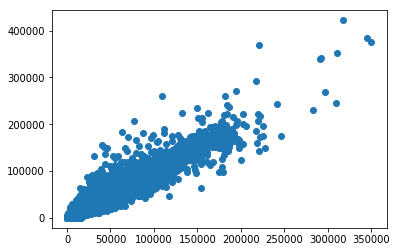

In [310]:
#scatter plot on the whole dev set prediction seems to be linear in lower GMV area but higher in high GMV
#so this model will be used in order to make prediction for the dev set
plt.scatter(X_dev.Predicted_GMV,X_dev.Actual_GMV)

In [311]:
X_test = test_combined[[u'Category', u'sub category', u'IsHoliday',
       u'category type', u'No. of products', u'delivery charge', u'Ad spend', u'App time', u'Month',
       u'Year']]
#Dropping columns Promtions has increased the performance on the dev set. Since I have populated 
#these variables earlier with zero might have increased the noise

In [312]:
test_combined['Predicted_GMV'] = model.predict(X_test)

In [313]:
test_ans = test_combined[['Category','sub category','Date','IsHoliday','Predicted_GMV']]

In [314]:
test_ans['Category'] = lb_category.inverse_transform(test_ans['Category'])
test_ans['sub category'] = lb_subcategory.inverse_transform(test_ans['sub category'])
test_ans['IsHoliday'] = lb_IsHoliday.inverse_transform(test_ans['IsHoliday'])


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [297]:
test_ans.to_csv('First_iteration_result_GMV.csv',index=False)

In [322]:
test_ans.to_csv('Final_iteration_result_GMV.csv',index=False)

In [323]:
test_ans.shape

(29999, 5)